In [1]:
from sklearn import svm , tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
###################################################################
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
import numpy as np
from numpy import mean, var
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import librosa
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [3]:
N_FRAMES = 1024
SHIFT_WINDOW = 512
MELS = 13

In [4]:
folders = ['records hazeena/ziad', 'records hazeena/morad', 'records hazeena/mask', 'records hazeena/ashf' , 'records hazeena/emad']
base_directory = r"G:\Projects\3rd sbe\DSP-Fall23\DSP-task5"
users_data = []
for audio_path in folders:
    audios = os.listdir(audio_path)
    print("ana", audios)
    for audio in audios:
        users_data.append(os.path.join(base_directory, audio_path, audio))

data = []
data.extend(users_data)        

ana ['ziad1.wav', 'ziad10.wav', 'ziad11.wav', 'ziad12.wav', 'ziad13.wav', 'ziad14.wav', 'ziad15.wav', 'ziad16.wav', 'ziad17.wav', 'ziad18.wav', 'ziad19.wav', 'ziad2.wav', 'ziad20.wav', 'ziad21.wav', 'ziad22.wav', 'ziad23.wav', 'ziad24.wav', 'ziad25.wav', 'ziad26.wav', 'ziad27.wav', 'ziad28.wav', 'ziad29.wav', 'ziad3.wav', 'ziad30.wav', 'ziad31.wav', 'ziad32.wav', 'ziad33.wav', 'ziad4.wav', 'ziad5.wav', 'ziad6.wav', 'ziad7.wav', 'ziad8.wav', 'ziad9.wav']
ana ['morad1.wav', 'morad10.wav', 'morad11.wav', 'morad12.wav', 'morad13.wav', 'morad14.wav', 'morad15.wav', 'morad16.wav', 'morad17.wav', 'morad18.wav', 'morad19.wav', 'morad2.wav', 'morad20.wav', 'morad21.wav', 'morad22.wav', 'morad23.wav', 'morad24.wav', 'morad25.wav', 'morad26.wav', 'morad27.wav', 'morad28.wav', 'morad29.wav', 'morad3.wav', 'morad30.wav', 'morad31.wav', 'morad32.wav', 'morad33.wav', 'morad4.wav', 'morad5.wav', 'morad6.wav', 'morad7.wav', 'morad8.wav', 'morad9.wav']
ana ['mask1.wav', 'mask10.wav', 'mask11.wav', 'mask

In [5]:
speaker = []
for d in data:
    if "ashf" in d: # append 1 for ashf
        speaker.append(0)
    if "mask" in d: # append 2 for mask
        speaker.append(1)
    if "morad" in d: # append 3 for morad
        speaker.append(2)
    if "ziad" in d: # append 4 for ziad
        speaker.append(3)
    if "emad" in d:
        speaker.append(4)    
len(speaker)

162

In [6]:
voicefingerprintframe = pd.DataFrame()
voicefingerprintframe['data'] = data
voicefingerprintframe['speaker'] = speaker
voicefingerprintframe

,data,speaker
0,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3
1,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3
2,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3
3,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3
4,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3
...,...,...
157,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4
158,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4
159,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4
160,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4


In [7]:
# def transform_audio(audio, N_FRAMES, SHIFT_WINDOW, MELS):
#     audio_array, sr = librosa.load(audio, duration=2)
#     log_mel_audio_list_mean = []
#     log_mel_audio_list_var = []
#     mfccs_audio_list_mean = []
#     mfccs_audio_list_var = []
#     cqt_audio_list_mean = []
#     cqt_audio_list_var = []
#     chromagram_audio_list_mean = []
#     chromagram_audio_list_var = []
#     tone_audio_list_mean = []
#     tone_audio_list_var = []
#     log_mel_audio = librosa.power_to_db(librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW, n_mels=MELS))
#     mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
#     cqt_audio = np.abs(librosa.cqt(y=audio_array, sr=sr, hop_length=SHIFT_WINDOW))
#     chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
#     tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)

#     for i in range(len(log_mel_audio)):
#          log_mel_audio_list_mean.append(log_mel_audio[i].mean())
#          log_mel_audio_list_var.append(log_mel_audio[i].var())

#     for i in range(len(mfccs_audio)):
#          mfccs_audio_list_mean.append(mfccs_audio[i].mean())
#          mfccs_audio_list_var.append(mfccs_audio[i].var())

#     for i in range(len(cqt_audio)):
#          cqt_audio_list_mean.append(cqt_audio[i].mean())
#          cqt_audio_list_var.append(cqt_audio[i].var())

#     for i in range(len(chromagram_audio)):
#          chromagram_audio_list_mean.append(chromagram_audio[i].mean())
#          chromagram_audio_list_var.append(chromagram_audio[i].var())

#     for i in range(len(tone_audio)):
#          tone_audio_list_mean.append(tone_audio[i].mean())
#          tone_audio_list_var.append(tone_audio[i].var())

#     sc_audio = librosa.feature.spectral_centroid(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
#     sb_audio = librosa.feature.spectral_bandwidth(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
#     sr_audio = librosa.feature.spectral_rolloff(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)

#     ae_audio = fancy_amplitude_envelope(audio_array, N_FRAMES, SHIFT_WINDOW)
#     rms_audio = librosa.feature.rms(audio_array, frame_length=N_FRAMES, hop_length=SHIFT_WINDOW)

#     return np.hstack((mean(ae_audio), var(ae_audio), mean(rms_audio), var(rms_audio), mean(sc_audio), var(sc_audio), mean(sb_audio), var(sb_audio), mean(sr_audio), var(sr_audio), chromagram_audio_list_mean, chromagram_audio_list_var, tone_audio_list_mean, tone_audio_list_var, cqt_audio_list_mean, cqt_audio_list_var, mfccs_audio_list_mean, mfccs_audio_list_var, log_mel_audio_list_mean, log_mel_audio_list_var))

def transform_audio(audio, N_FRAMES, SHIFT_WINDOW, MELS):
    audio_array, sr = librosa.load(audio, duration=2)
    
    log_mel_audio = librosa.power_to_db(librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW, n_mels=MELS))
    mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    cqt_audio = np.abs(librosa.cqt(y=audio_array, sr=sr, hop_length=SHIFT_WINDOW))
    chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)

    log_mel_audio_mean_var = np.column_stack((log_mel_audio.mean(axis=1), log_mel_audio.var(axis=1)))
    mfccs_audio_mean_var = np.column_stack((mfccs_audio.mean(axis=1), mfccs_audio.var(axis=1)))
    cqt_audio_mean_var = np.column_stack((cqt_audio.mean(axis=1), cqt_audio.var(axis=1)))
    chromagram_audio_mean_var = np.column_stack((chromagram_audio.mean(axis=1), chromagram_audio.var(axis=1)))
    tone_audio_mean_var = np.column_stack((tone_audio.mean(axis=1), tone_audio.var(axis=1)))

    sc_audio = librosa.feature.spectral_centroid(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    sb_audio = librosa.feature.spectral_bandwidth(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    sr_audio = librosa.feature.spectral_rolloff(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)

    ae_audio = fancy_amplitude_envelope(audio_array, N_FRAMES, SHIFT_WINDOW)
    rms_audio = librosa.feature.rms(audio_array, frame_length=N_FRAMES, hop_length=SHIFT_WINDOW)

    return np.hstack((
        ae_audio.mean(), ae_audio.var(),
        rms_audio.mean(), rms_audio.var(),
        sc_audio.mean(), sc_audio.var(),
        sb_audio.mean(), sb_audio.var(),
        sr_audio.mean(), sr_audio.var(),
        chromagram_audio_mean_var.flatten(),
        tone_audio_mean_var.flatten(),
        cqt_audio_mean_var.flatten(),
        mfccs_audio_mean_var.flatten(),
        log_mel_audio_mean_var.flatten()
    ))
def fancy_amplitude_envelope(signal, framesize, SHIFT_WINDOW):
    return np.array([max(signal[i:i+framesize]) for i in range(0, len(signal), SHIFT_WINDOW)])

In [8]:
samples_no = len(voicefingerprintframe['data'])
features_length = len(transform_audio(voicefingerprintframe['data'].iloc[0], 1024, 512, 13))

In [9]:
features_df = pd.DataFrame()
features_df['data'] = voicefingerprintframe['data'].copy()
features_df['speaker'] = voicefingerprintframe['speaker'].copy()

for i in tqdm(range(features_length)):
    features_df[f'feature {i}'] = np.zeros(samples_no)

temp_array = []
for index, row in tqdm(features_df.iloc[:].iterrows()):
    if index < len(features_df)-1:
        array_1 = transform_audio(features_df.loc[index, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
        array_2 = transform_audio(features_df.loc[index+1, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
        combined_array = np.vstack((array_1, array_2))[0]
        temp_array.append(list(combined_array))

last_element = transform_audio(features_df.loc[len(features_df)-1, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
temp_array.append(list(last_element))



features_df.iloc[:,2:] = pd.DataFrame(temp_array).copy()
features_df

100%|██████████| 266/266 [00:00<00:00, 4905.99it/s]
162it [01:08,  2.36it/s]


,data,speaker,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,...,feature 256,feature 257,feature 258,feature 259,feature 260,feature 261,feature 262,feature 263,feature 264,feature 265
0,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.024370,0.000609,0.010676,0.000129,1661.365728,9.930769e+05,2270.601401,350599.510867,...,-53.121311,140.430054,-57.097363,95.937889,-59.303078,73.036362,-60.311699,64.469719,-60.631088,67.496574
1,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.019073,0.000452,0.008122,0.000079,1627.141763,8.377539e+05,2111.395080,315990.430854,...,-52.828686,179.550278,-57.300949,107.859680,-61.240768,78.294052,-62.156788,71.309242,-63.938404,63.221668
2,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.022034,0.000724,0.008910,0.000112,1691.341401,9.099938e+05,2166.834979,319032.232878,...,-53.316608,226.775482,-57.000366,144.828842,-59.745247,109.786797,-60.902927,101.534325,-62.734867,84.176384
3,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.034078,0.001426,0.014033,0.000275,1913.012238,1.100798e+06,2089.784578,292422.513898,...,-45.567822,277.450958,-49.339985,180.348587,-54.471622,132.384140,-56.241470,136.797882,-58.217377,106.776031
4,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.024765,0.000556,0.009789,0.000089,1506.910405,6.752241e+05,1866.646837,192651.896534,...,-49.060177,152.536926,-53.599667,98.503647,-59.190041,81.269012,-61.183853,72.307991,-62.887043,64.250648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.277368,0.054905,0.118008,0.010911,1854.957880,1.279313e+06,1668.811696,153535.613328,...,-22.986609,181.123581,-24.439228,157.818314,-31.808807,139.512390,-37.081635,141.839523,-49.465996,98.719269
158,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.252898,0.055479,0.109585,0.011298,1714.055803,1.519046e+06,1615.660592,138799.425935,...,-27.128704,213.915161,-28.779619,157.865417,-33.920494,182.013443,-39.899441,190.355621,-50.217056,155.079803
159,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.200218,0.056019,0.084020,0.010226,1428.644340,9.225220e+05,1667.774161,116819.955105,...,-31.083229,235.698715,-33.286060,186.117264,-39.608616,157.457901,-45.515594,194.005219,-53.260937,147.700256
160,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.200218,0.056019,0.084020,0.010226,1428.644340,9.225220e+05,1667.774161,116819.955105,...,-31.083229,235.698715,-33.286060,186.117264,-39.608616,157.457901,-45.515594,194.005219,-53.260937,147.700256


In [10]:
def stat_analysis(df, n):
    #-----------------------------------------------------------------------------------------
    # Check correlation
    corr = df.corr()

    # Set up the matplotlib plot configuration
    plt.figure(figsize=(35,10))

    plt.subplot(1,2,1)

    # Generate a mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap
    plt.title('Correlation')
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


    #-----------------------------------------------------------------------------------------
    # Perform PCA to make dimensionality reduction
    pca = PCA()

    # Fit the standardized data to the pca
    pca=pca.fit(df)

    # Plot the proportion of variance explained on the y-axis of the bar plot
    # Set up the matplotlib plot configuration
    plt.subplot(1,2,2)
    plt.title('PCA')
    plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
    plt.xlabel('Principal component #')
    plt.ylabel('Proportion of variance explained')
    plt.xticks(range(df.shape[1]))

    two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[n]
    print("The cumulative variance of the first several principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

In [11]:
# Select best features
X_train_feat, _, y_train_feat ,_ = train_test_split(features_df.drop(labels=['data', 'speaker'], axis=1),
    features_df.iloc[:,1],
    test_size=0.3,
    random_state=0)

mutual_info_classif(X_train_feat, y_train_feat)

sel_cols_general = SelectKBest(mutual_info_classif, k=100)
sel_cols_general.fit(X_train_feat, y_train_feat)
speaker_features_general = list(X_train_feat.columns[sel_cols_general.get_support()])
speaker_features_general

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 68',
 'feature 84',
 'feature 86',
 'feature 87',
 'feature 88',
 'feature 89',
 'feature 90',
 'feature 91',
 'feature 92',
 'feature 93',
 'feature 94',
 'feature 95',
 'feature 96',
 'feature 97',
 'feature 98',
 'feature 99',
 'feature 100',
 'feature 101',
 'feature 102',
 'feature 103',
 'feature 104',
 'feature 105',
 'feature 106',
 'feature 107',
 'feature 108',
 'feature 109',
 'feature 110',
 'feature 111',
 'feature 112',
 'feature 113',
 'feature 114',
 'feature 116',
 'feature 117',
 'feature 118',
 'feature 119',
 'feature 120',
 'feature 121',
 'feature 124',
 'feature 126',
 'feature 127',
 'feature 128',
 'feature 129',
 'feature 130',
 'feature 132',
 'feature 133',
 'feature 135',
 'feature 136',
 'feature 138',
 'feature 140',
 'feature 142',
 'feature 143',
 'feature 144',
 'feature 145',
 'feature 146',
 'feature 162',
 'feature 174',
 'feature 176',
 'feature 178',
 'feature 188',
 'feature 190',


In [12]:
# to see the correlation between the target and the other features
temp = speaker_features_general.copy()
temp.append('speaker')

The cumulative variance of the first several principal components is 0.98809


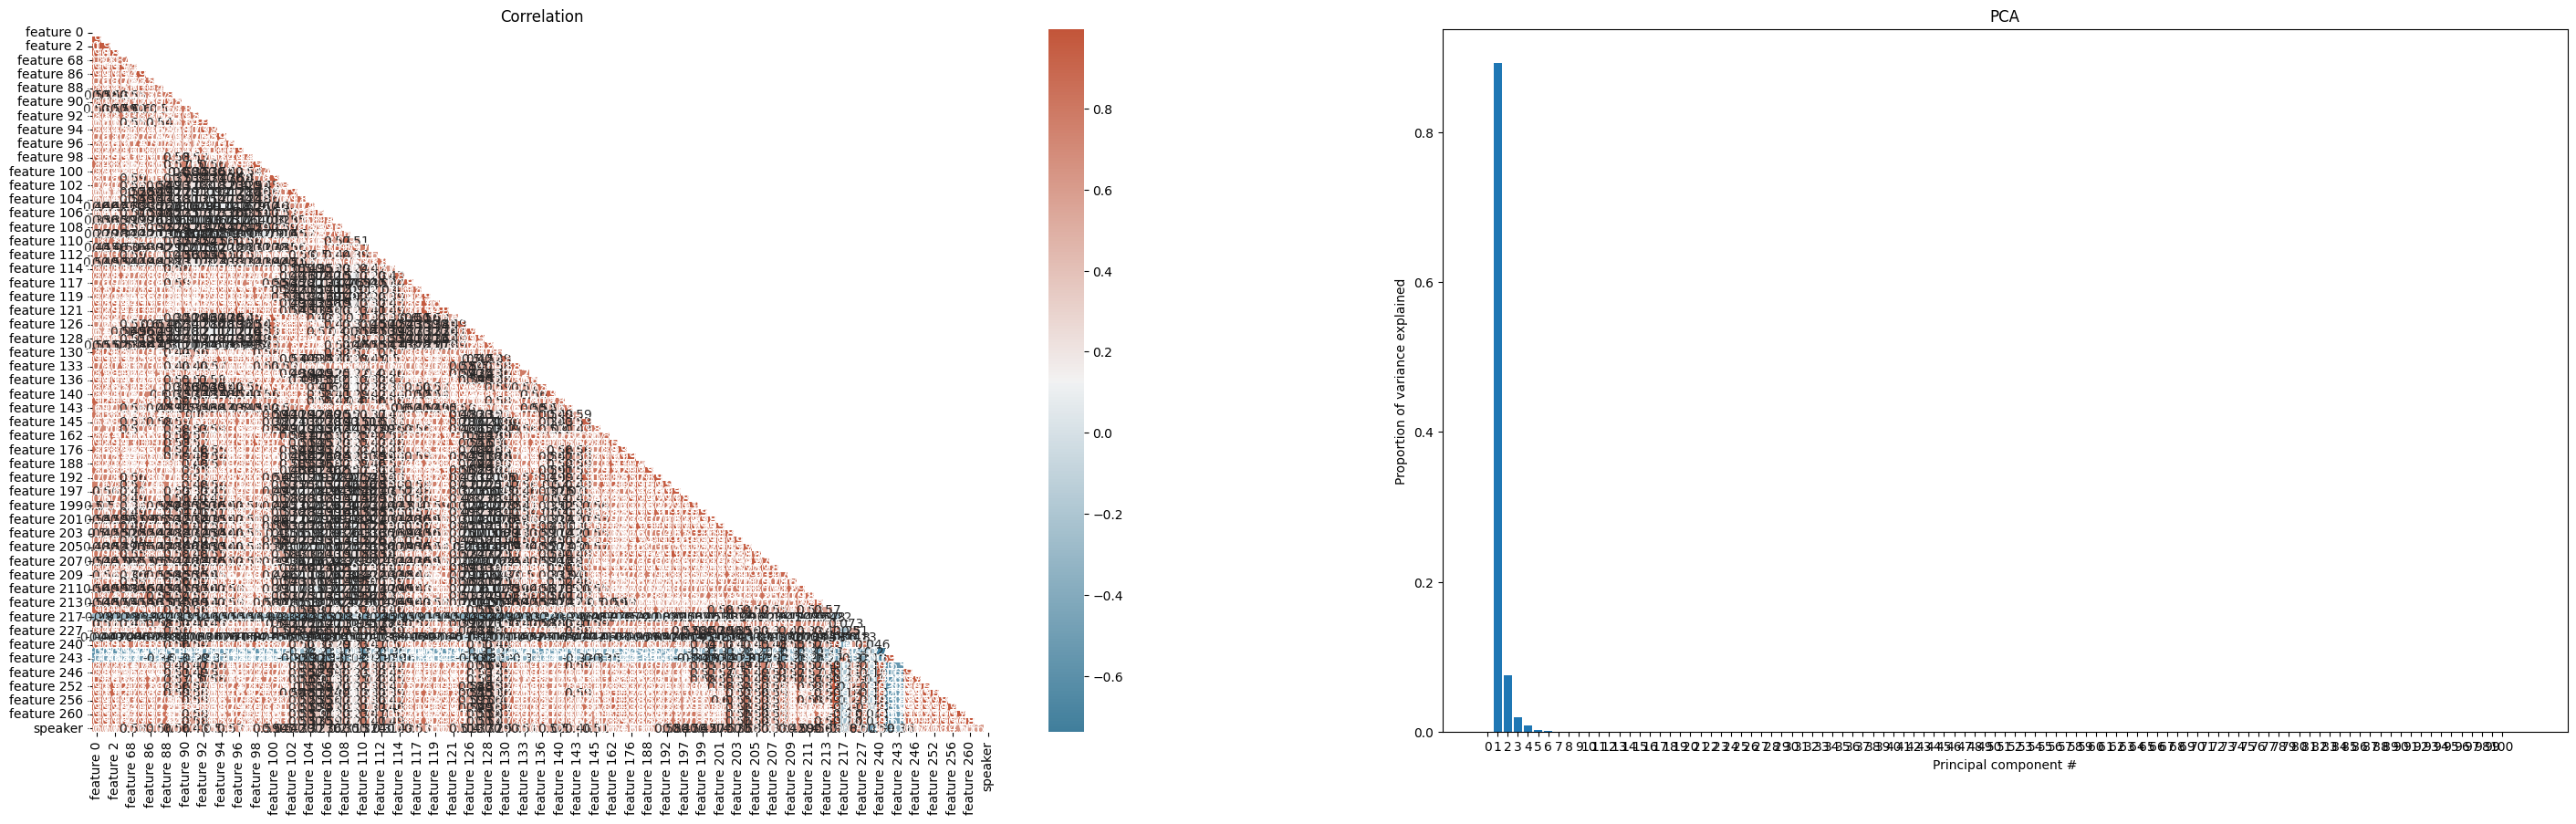

In [13]:
# stat_analysis(features_df.iloc[:,1:], 2)
stat_analysis(features_df[temp], 2)
temp.remove('speaker')

In [14]:
def transform_audio(audio, N_FRAMES, SHIFT_WINDOW, MELS):
    audio_array, sr = librosa.load(audio, duration=2)

    log_mel_audio = librosa.power_to_db(librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW, n_mels=MELS))
    mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    cqt_audio = np.abs(librosa.cqt(y=audio_array, sr=sr, hop_length=SHIFT_WINDOW))
    chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)

    log_mel_audio_list_mean = np.mean(log_mel_audio, axis=1)
    log_mel_audio_list_var = np.var(log_mel_audio, axis=1)

    mfccs_audio_list_mean = np.mean(mfccs_audio, axis=1)
    mfccs_audio_list_var = np.var(mfccs_audio, axis=1)

    cqt_audio_list_mean = np.mean(cqt_audio, axis=1)
    cqt_audio_list_var = np.var(cqt_audio, axis=1)

    chromagram_audio_list_mean = np.mean(chromagram_audio, axis=1)
    chromagram_audio_list_var = np.var(chromagram_audio, axis=1)

    tone_audio_list_mean = np.mean(tone_audio, axis=1)
    tone_audio_list_var = np.var(tone_audio, axis=1)

    sb_audio = librosa.feature.spectral_bandwidth(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)

    ae_audio = fancy_amplitude_envelope(audio_array, N_FRAMES, SHIFT_WINDOW)
    rms_audio = librosa.feature.rms(audio_array, frame_length=N_FRAMES, hop_length=SHIFT_WINDOW)

    result = np.hstack((np.mean(ae_audio), np.var(ae_audio), np.mean(rms_audio), np.var(rms_audio),
                        np.mean(sb_audio), np.var(sb_audio),
                        chromagram_audio_list_mean, chromagram_audio_list_var,
                        tone_audio_list_mean, tone_audio_list_var,
                        cqt_audio_list_mean, cqt_audio_list_var,
                        mfccs_audio_list_mean, mfccs_audio_list_var,
                        log_mel_audio_list_mean, log_mel_audio_list_var))

    return result

def fancy_amplitude_envelope(signal, framesize, SHIFT_WINDOW):
    return np.array([max(signal[i:i+framesize]) for i in range(0, len(signal), SHIFT_WINDOW)])

In [15]:
samples_no = len(voicefingerprintframe['data'])
features_length = len(transform_audio(voicefingerprintframe['data'].iloc[0], N_FRAMES, SHIFT_WINDOW, MELS))

In [16]:
features_df = pd.DataFrame()
features_df['data'] = voicefingerprintframe['data'].copy()
features_df['speaker'] = voicefingerprintframe['speaker'].copy()

for i in tqdm(range(features_length)):
    features_df[f'feature {i}'] = np.zeros(samples_no)

temp_array = []
for index, row in tqdm(features_df.iloc[:].iterrows()):
    if index < len(features_df)-1:
        array_1 = transform_audio(features_df.loc[index, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
        array_2 = transform_audio(features_df.loc[index+1, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
        combined_array = np.vstack((array_1, array_2))[0]
        temp_array.append(list(combined_array))

last_element = transform_audio(features_df.loc[len(features_df)-1, ['data']][0], N_FRAMES, SHIFT_WINDOW, MELS)
temp_array.append(list(last_element))


features_df.iloc[:,2:] = pd.DataFrame(temp_array).copy()
features_df

100%|██████████| 262/262 [00:00<00:00, 5401.63it/s]
162it [01:09,  2.33it/s]


,data,speaker,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,...,feature 252,feature 253,feature 254,feature 255,feature 256,feature 257,feature 258,feature 259,feature 260,feature 261
0,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.024370,0.000609,0.010676,0.000129,2270.601401,350599.510867,0.626530,0.677490,...,149.790482,128.877411,163.182373,158.696274,166.632111,140.430054,95.937889,73.036362,64.469719,67.496574
1,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.019073,0.000452,0.008122,0.000079,2111.395080,315990.430854,0.383725,0.383794,...,231.843613,215.286972,224.212692,200.944305,207.329697,179.550278,107.859680,78.294052,71.309242,63.221668
2,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.022034,0.000724,0.008910,0.000112,2166.834979,319032.232878,0.501062,0.443183,...,228.314133,190.171890,185.692871,226.150192,266.519653,226.775482,144.828842,109.786797,101.534325,84.176384
3,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.034078,0.001426,0.014033,0.000275,2089.784578,292422.513898,0.303172,0.369505,...,264.632843,240.459656,290.137207,272.081635,298.236053,277.450958,180.348587,132.384140,136.797882,106.776031
4,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,3,0.024765,0.000556,0.009789,0.000089,1866.646837,192651.896534,0.272716,0.293058,...,178.804230,165.430618,198.467178,171.211548,190.823776,152.536926,98.503647,81.269012,72.307991,64.250648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.277368,0.054905,0.118008,0.010911,1668.811696,153535.613328,0.614836,0.642369,...,198.983322,177.716782,234.378586,283.943085,289.316467,181.123581,157.818314,139.512390,141.839523,98.719269
158,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.252898,0.055479,0.109585,0.011298,1615.660592,138799.425935,0.667654,0.604948,...,208.449600,205.484512,279.729248,327.381683,329.675812,213.915161,157.865417,182.013443,190.355621,155.079803
159,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.200218,0.056019,0.084020,0.010226,1667.774161,116819.955105,0.807674,0.814575,...,238.204773,235.496414,272.300720,398.860901,411.834778,235.698715,186.117264,157.457901,194.005219,147.700256
160,G:\Projects\3rd sbe\DSP-Fall23\DSP-task5\recor...,4,0.200218,0.056019,0.084020,0.010226,1667.774161,116819.955105,0.807674,0.814575,...,238.204773,235.496414,272.300720,398.860901,411.834778,235.698715,186.117264,157.457901,194.005219,147.700256


In [17]:
features_df.iloc[:,2:].to_csv("datasets\\users_dataset_features.csv", index=False)
# features_df[temp].to_csv("datasets\\users_dataset_features.csv", index=False)
features_df['speaker'].to_csv('datasets\\users_dataset_target.csv', index=False)


---------------------------
--------------------------


In [18]:
x_data = np.array(pd.read_csv('datasets\\users_dataset_features.csv'))
y_data = np.array(pd.read_csv('datasets\\users_dataset_target.csv'))
x_data

array([[2.43701413e-02, 6.08817441e-04, 1.06759295e-02, ...,
        7.30363617e+01, 6.44697189e+01, 6.74965744e+01],
       [1.90730467e-02, 4.52178909e-04, 8.12215265e-03, ...,
        7.82940521e+01, 7.13092422e+01, 6.32216682e+01],
       [2.20335238e-02, 7.23842066e-04, 8.91036447e-03, ...,
        1.09786797e+02, 1.01534325e+02, 8.41763840e+01],
       ...,
       [2.00218171e-01, 5.60193956e-02, 8.40200633e-02, ...,
        1.57457901e+02, 1.94005219e+02, 1.47700256e+02],
       [2.00218171e-01, 5.60193956e-02, 8.40200633e-02, ...,
        1.57457901e+02, 1.94005219e+02, 1.47700256e+02],
       [2.98642665e-01, 7.48450458e-02, 1.25204399e-01, ...,
        7.95494080e+01, 1.28768555e+02, 1.17207268e+02]])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [20]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
classifier = RandomForestClassifier(random_state = 0, n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=90, bootstrap=False)

classifier.fit(x_train, y_train)
classifier

RandomForestClassifier(bootstrap=False, max_depth=90, n_estimators=200,
                       random_state=0)

In [22]:
from sklearn.metrics import accuracy_score
# Testing accuracy
test_predictions = classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f' Accuracy: {test_accuracy * 100:.2f}%')


 Accuracy: 100.00%


In [23]:
def transform_audio(audio, N_FRAMES, SHIFT_WINDOW, MELS):
    audio_array, sr = librosa.load(audio, duration=2)

    log_mel_audio = librosa.power_to_db(librosa.feature.melspectrogram(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW, n_mels=MELS))
    mfccs_audio = librosa.feature.mfcc(y=audio_array, n_mfcc=MELS, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    cqt_audio = np.abs(librosa.cqt(y=audio_array, sr=sr, hop_length=SHIFT_WINDOW))
    chromagram_audio = librosa.feature.chroma_stft(audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)
    tone_audio = librosa.feature.tonnetz(y=audio_array, sr=sr)

    log_mel_audio_list_mean = np.mean(log_mel_audio, axis=1)
    log_mel_audio_list_var = np.var(log_mel_audio, axis=1)

    mfccs_audio_list_mean = np.mean(mfccs_audio, axis=1)
    mfccs_audio_list_var = np.var(mfccs_audio, axis=1)

    cqt_audio_list_mean = np.mean(cqt_audio, axis=1)
    cqt_audio_list_var = np.var(cqt_audio, axis=1)

    chromagram_audio_list_mean = np.mean(chromagram_audio, axis=1)
    chromagram_audio_list_var = np.var(chromagram_audio, axis=1)

    tone_audio_list_mean = np.mean(tone_audio, axis=1)
    tone_audio_list_var = np.var(tone_audio, axis=1)

    sb_audio = librosa.feature.spectral_bandwidth(y=audio_array, sr=sr, n_fft=N_FRAMES, hop_length=SHIFT_WINDOW)

    ae_audio = fancy_amplitude_envelope(audio_array, N_FRAMES, SHIFT_WINDOW)
    rms_audio = librosa.feature.rms(audio_array, frame_length=N_FRAMES, hop_length=SHIFT_WINDOW)

    result = np.hstack((np.mean(ae_audio), np.var(ae_audio), np.mean(rms_audio), np.var(rms_audio),
                        np.mean(sb_audio), np.var(sb_audio),
                        chromagram_audio_list_mean, chromagram_audio_list_var,
                        tone_audio_list_mean, tone_audio_list_var,
                        cqt_audio_list_mean, cqt_audio_list_var,
                        mfccs_audio_list_mean, mfccs_audio_list_var,
                        log_mel_audio_list_mean, log_mel_audio_list_var))

    return result

def fancy_amplitude_envelope(signal, framesize, SHIFT_WINDOW):
    return np.array([max(signal[i:i+framesize]) for i in range(0, len(signal), SHIFT_WINDOW)])

In [24]:
def test_classifier(path):
    file_paths = "records hazeena/others/"
    for file in os.listdir(file_paths):
        audio = file_paths+file
        x_ver = transform_audio(audio, 1024, 512, 13)
        x_ver = sc.transform(x_ver.reshape(1,-1))

        print(file)
        print(classifier.predict(x_ver))

In [25]:
test_classifier("others")

ashf15.wav
[0]
ashf16.wav
[0]
ashf17.wav
[0]
ashf18.wav
[0]
ashf19.wav
[0]
ashf20.wav
[0]
ashf21.wav
[0]
mask3.wav
[1]
morad4.wav
[2]
morta.wav
[2]
UserInput.wav
[0]
WhatsApp Ptt 2024-01-03 at 5.28.42 PM.ogg
[4]
WhatsApp Ptt 2024-01-03 at 5.28.46 PM.ogg
[4]
WhatsApp Ptt 2024-01-03 at 5.28.52 PM.ogg
[4]
ziad11.wav
[3]
ziad22.wav
[3]
ziad23.wav
[3]
ziad24.wav
[3]
ziad25.wav
[3]
ziad26.wav
[3]
ziad27.wav
[3]
ziad28.wav
[3]
zizo1.wav
[3]


In [27]:
import pickle
pickle.dump(classifier, open("classifier.pkl",'wb'))